In [28]:
import urllib.request
from urllib.parse import quote
from bs4 import BeautifulSoup
import datetime
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import pytagcloud
import webbrowser
import konlpy
from konlpy.corpus import kobill 
from konlpy.tag import Twitter 
from collections import Counter
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import seaborn as sn
import numpy as np
from sklearn.cluster import KMeans

In [2]:
def get_news(news_url) :
    donga_news = []
    dreq = urllib.request.urlopen(news_url)
    dsoup = BeautifulSoup(dreq, 'html.parser')
    
    contents = dsoup.select('div.article_txt')
    for content in contents:
        string_content = str(content.find_all(text=True))
        donga_news.append(string_content)
    
    
    return donga_news

In [3]:
def search_news(keyword):
    default_url = "http://news.donga.com/search?p="
    keyword_url = '&query='
    rest_url = "&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1"
    page = 1
    with open (keyword + ".txt", "w", encoding="utf-8") as f :
        while page < 1000 :
            url = default_url + str(page) + keyword_url + quote(keyword) + rest_url
            req = urllib.request.urlopen(url)
            print(url)
            soup = BeautifulSoup(req, 'html.parser')
        
            for urls in soup.find_all('p','tit'):
                try :
                    print(urls.a['href'])
                    news = get_news(urls.a['href'])
                    f.writelines(news)
                except Exception as e : 
                    continue
            page += 16
    wordlist = []           
    with open(keyword+".txt", 'r', encoding="utf-8") as f :
        wordlist.append(f.read())
        
    return wordlist     

In [4]:
clustering_list1 = search_news('경제')
clustering_list2 = search_news("게임")
clustering_list3 = search_news('정치')
clustering_list4 = search_news('의료')

http://news.donga.com/search?p=1&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180620/90662001/1
http://news.donga.com/3/all/20180619/90661829/1
http://news.donga.com/3/all/20180619/90661848/1
http://news.donga.com/3/all/20180619/90661228/1
http://news.donga.com/3/all/20180619/90660669/1
http://news.donga.com/3/all/20180619/90660206/1
http://news.donga.com/3/all/20180619/90658675/1
http://news.donga.com/3/all/20180619/90658669/1
http://news.donga.com/3/all/20180619/90657583/1
http://news.donga.com/3/all/20180619/90657428/1
http://news.donga.com/3/all/20180619/90657366/1
http://news.donga.com/3/all/20180619/90657081/1
http://news.donga.com/3/all/20180619/90656810/1
http://news.donga.com/3/all/20180619/90656768/1
http://news.donga.com/3/all/20180619/90656565/1
http://news.donga.com/search?p=17&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180619/906563

http://news.donga.com/3/all/20180618/90643881/1
http://news.donga.com/3/all/20180618/90643886/1
http://news.donga.com/3/all/20180619/90644209/1
http://news.donga.com/3/all/20180619/90644244/1
http://news.donga.com/search?p=161&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180618/90635108/1
http://news.donga.com/3/all/20180618/90635132/1
http://news.donga.com/3/all/20180618/90634763/1
http://news.donga.com/3/all/20180618/90635361/1
http://news.donga.com/3/all/20180618/90635272/1
http://news.donga.com/3/all/20180618/90635318/1
http://news.donga.com/3/all/20180618/90635471/1
http://news.donga.com/3/all/20180618/90635505/1
http://news.donga.com/3/all/20180618/90635524/1
http://news.donga.com/3/all/20180619/90645124/1
http://news.donga.com/3/all/20180618/90643511/1
http://news.donga.com/3/all/20180618/90635807/1
http://news.donga.com/3/all/20180618/90635350/1
http://news.donga.com/3/all/20180618/90643722/1
http://news.dong

http://news.donga.com/3/all/20180617/90615637/1
http://news.donga.com/3/all/20180617/90615629/1
http://news.donga.com/3/all/20180617/90615624/1
http://news.donga.com/3/all/20180617/90615620/1
http://news.donga.com/3/all/20180617/90615054/1
http://news.donga.com/3/all/20180617/90615033/1
http://news.donga.com/3/all/20180617/90614866/1
http://news.donga.com/3/all/20180617/90614606/1
http://news.donga.com/search?p=321&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180617/90614596/1
http://news.donga.com/3/all/20180617/90614454/1
http://news.donga.com/3/all/20180617/90614455/1
http://news.donga.com/3/all/20180617/90614452/1
http://news.donga.com/3/all/20180617/90614442/1
http://news.donga.com/3/all/20180617/90614410/1
http://news.donga.com/3/all/20180617/90614412/1
http://news.donga.com/3/all/20180616/90612304/1
http://news.donga.com/3/all/20180616/90611337/1
http://news.donga.com/3/all/20180616/90610479/1
http://news.dong

http://news.donga.com/3/all/20180614/90590056/1
http://news.donga.com/3/all/20180615/90591259/1
http://news.donga.com/3/all/20180615/90591487/1
http://news.donga.com/3/all/20180615/90591220/1
http://news.donga.com/3/all/20180614/90590748/1
http://news.donga.com/3/all/20180614/90590797/1
http://news.donga.com/3/all/20180614/90573729/1
http://news.donga.com/3/all/20180615/90591545/1
http://news.donga.com/3/all/20180614/90590733/1
http://news.donga.com/3/all/20180614/90590397/1
http://news.donga.com/3/all/20180614/90590358/1
http://news.donga.com/search?p=481&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180614/90590330/1
http://news.donga.com/3/all/20180614/90589929/1
http://news.donga.com/3/all/20180614/90589696/1
http://news.donga.com/3/all/20180614/90588559/2
http://news.donga.com/3/all/20180614/90588234/1
http://news.donga.com/3/all/20180614/90586909/2
http://news.donga.com/3/all/20180614/90586517/1
http://news.dong

http://news.donga.com/3/all/20180614/90571358/1
http://news.donga.com/3/all/20180614/90571345/1
http://news.donga.com/3/all/20180614/90571223/1
http://news.donga.com/3/all/20180614/90571131/1
http://news.donga.com/3/all/20180614/90570451/1
http://news.donga.com/3/all/20180614/90570423/1
http://news.donga.com/3/all/20180614/90570095/1
http://news.donga.com/3/all/20180614/90569717/1
http://news.donga.com/3/all/20180613/90569584/1
http://news.donga.com/3/all/20180613/90569564/1
http://news.donga.com/3/all/20180613/90569520/1
http://news.donga.com/3/all/20180613/90569504/1
http://news.donga.com/3/all/20180613/90567674/1
http://news.donga.com/3/all/20180613/90567156/1
http://news.donga.com/search?p=641&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180613/90566940/1
http://news.donga.com/3/all/20180613/90566875/1
http://news.donga.com/3/all/20180613/90565614/1
http://news.donga.com/3/all/20180613/90564699/1
http://news.dong

http://news.donga.com/search?p=785&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180611/90533269/1
http://news.donga.com/3/all/20180611/90533280/1
http://news.donga.com/3/all/20180611/90533305/1
http://news.donga.com/3/all/20180611/90533323/1
http://news.donga.com/3/all/20180612/90534390/1
http://news.donga.com/3/all/20180611/90533518/1
http://news.donga.com/3/all/20180611/90533420/1
http://news.donga.com/3/all/20180612/90534195/1
http://news.donga.com/3/all/20180612/90533803/1
http://news.donga.com/3/all/20180612/90534364/1
http://news.donga.com/3/all/20180612/90534013/1
http://news.donga.com/3/all/20180611/90530891/1
http://news.donga.com/3/all/20180611/90530602/1
http://news.donga.com/3/all/20180611/90530514/1
http://news.donga.com/3/all/20180611/90530463/1
http://news.donga.com/search?p=801&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180611/905

http://news.donga.com/3/all/20180610/90515233/1
http://news.donga.com/3/all/20180610/90515411/1
http://news.donga.com/3/all/20180610/90515424/1
http://news.donga.com/3/all/20180610/90515428/1
http://news.donga.com/search?p=945&query=%EA%B2%BD%EC%A0%9C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180610/90483325/1
http://news.donga.com/3/all/20180609/90482034/1
http://news.donga.com/3/all/20180609/90481331/1
http://news.donga.com/3/all/20180609/90479566/1
http://news.donga.com/3/all/20180609/90477509/1
http://news.donga.com/3/all/20180609/90476952/2
http://news.donga.com/3/all/20180609/90476382/1
http://news.donga.com/3/all/20180609/90476341/1
http://news.donga.com/3/all/20180609/90476033/2
http://news.donga.com/3/all/20180609/90475335/1
http://news.donga.com/3/all/20180609/90475103/1
http://news.donga.com/3/all/20180609/90474847/1
http://news.donga.com/3/all/20180609/90473899/1
http://news.donga.com/3/all/20180609/90473981/1
http://news.dong

http://news.donga.com/3/all/20180613/90558998/1
http://news.donga.com/3/all/20180613/90554997/1
http://news.donga.com/3/all/20180613/90554988/1
http://news.donga.com/3/all/20180613/90553463/1
http://news.donga.com/3/all/20180613/90551456/1
http://news.donga.com/3/all/20180613/90550883/1
http://news.donga.com/3/all/20180613/90550986/1
http://news.donga.com/3/all/20180613/90550909/1
http://news.donga.com/search?p=97&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180613/90550909/1
http://news.donga.com/3/all/20180612/90550654/1
http://news.donga.com/3/all/20180612/90548192/1
http://news.donga.com/3/all/20180612/90547168/1
http://news.donga.com/3/all/20180612/90546888/1
http://news.donga.com/3/all/20180612/90546458/1
http://news.donga.com/3/all/20180612/90544102/1
http://news.donga.com/3/all/20180612/90541131/2
http://news.donga.com/3/all/20180612/90537677/1
http://news.donga.com/3/all/20180612/90535158/1
http://news.donga

http://news.donga.com/3/all/20180531/90338099/1
http://news.donga.com/3/all/20180531/90336349/1
http://news.donga.com/3/all/20180531/90335441/1
http://news.donga.com/3/all/20180531/90335013/2
http://news.donga.com/3/all/20180530/90320879/1
http://news.donga.com/3/all/20180530/90320908/1
http://news.donga.com/3/all/20180530/90330088/1
http://news.donga.com/3/all/20180531/90330763/1
http://news.donga.com/3/all/20180531/90330812/1
http://news.donga.com/3/all/20180531/90331084/1
http://news.donga.com/3/all/20180531/90330822/1
http://news.donga.com/3/all/20180530/90329386/2
http://news.donga.com/search?p=257&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180530/90324791/1
http://news.donga.com/3/all/20180530/90324475/1
http://news.donga.com/3/all/20180530/90323220/1
http://news.donga.com/3/all/20180530/90319118/1
http://news.donga.com/3/all/20180530/90315608/1
http://news.donga.com/3/all/20180530/90316125/1
http://news.dong

http://news.donga.com/3/all/20180520/90160144/1
http://news.donga.com/3/all/20180520/90160005/1
http://news.donga.com/3/all/20180520/90159942/1
http://news.donga.com/3/all/20180519/90157075/1
http://news.donga.com/3/all/20180519/90155295/1
http://news.donga.com/3/all/20180519/90154081/1
http://news.donga.com/3/all/20180519/90151802/1
http://news.donga.com/3/all/20180518/90148869/1
http://news.donga.com/3/all/20180518/90147945/2
http://news.donga.com/3/all/20180518/90140769/2
http://news.donga.com/3/all/20180518/90138042/1
http://news.donga.com/3/all/20180517/90133608/4
http://news.donga.com/3/all/20180517/90133611/4
http://news.donga.com/3/all/20180517/90133615/4
http://news.donga.com/search?p=417&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180517/90133606/4
http://news.donga.com/3/all/20180517/90135640/1
http://news.donga.com/3/all/20180517/90135826/1
http://news.donga.com/3/all/20180517/90136344/1
http://news.dong

http://news.donga.com/search?p=561&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180505/89947834/1
http://news.donga.com/3/all/20180505/89944461/1
http://news.donga.com/3/all/20180505/89944535/1
http://news.donga.com/3/all/20180505/89944435/1
http://news.donga.com/3/all/20180504/89943377/2
http://news.donga.com/3/all/20180504/89942765/1
http://news.donga.com/3/all/20180504/89942674/2
http://news.donga.com/3/all/20180504/89942268/1
http://news.donga.com/3/all/20180504/89942102/1
http://news.donga.com/3/all/20180504/89941043/1
http://news.donga.com/3/all/20180504/89940822/2
http://news.donga.com/3/all/20180504/89938350/1
http://news.donga.com/3/all/20180504/89935852/2
http://news.donga.com/3/all/20180504/89935158/2
http://news.donga.com/3/all/20180504/89934197/1
http://news.donga.com/search?p=577&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180504/899

http://news.donga.com/3/all/20180424/89772535/1
http://news.donga.com/3/all/20180424/89772430/2
http://news.donga.com/3/all/20180424/89772094/1
http://news.donga.com/3/all/20180424/89771610/1
http://news.donga.com/search?p=721&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180424/89771610/1
http://news.donga.com/3/all/20180424/89767796/2
http://news.donga.com/3/all/20180424/89767435/1
http://news.donga.com/3/all/20180424/89764336/1
http://news.donga.com/3/all/20180424/89762374/1
http://news.donga.com/3/all/20180423/89758674/4
http://news.donga.com/3/all/20180423/89758923/4
http://news.donga.com/3/all/20180424/89759880/1
http://news.donga.com/3/all/20180424/89759830/1
http://news.donga.com/3/all/20180423/89757145/1
http://news.donga.com/3/all/20180423/89754265/2
http://news.donga.com/3/all/20180423/89748626/2
http://news.donga.com/3/all/20180423/89748333/1
http://news.donga.com/3/all/20180422/89740872/4
http://news.dong

http://news.donga.com/3/all/20180411/89553393/2
http://news.donga.com/3/all/20180410/89549219/5
http://news.donga.com/3/all/20180410/89550834/4
http://news.donga.com/3/all/20180410/89550964/4
http://news.donga.com/3/all/20180411/89551736/1
http://news.donga.com/3/all/20180411/89551771/1
http://news.donga.com/3/all/20180410/89547343/1
http://news.donga.com/3/all/20180410/89544355/2
http://news.donga.com/search?p=881&query=%EA%B2%8C%EC%9E%84&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180410/89542928/1
http://news.donga.com/3/all/20180410/89542905/1
http://news.donga.com/3/all/20180410/89542745/2
http://news.donga.com/3/all/20180410/89542663/2
http://news.donga.com/3/all/20180410/89542004/2
http://news.donga.com/3/all/20180410/89541668/1
http://news.donga.com/3/all/20180410/89541466/1
http://news.donga.com/3/all/20180410/89535780/1
http://news.donga.com/3/all/20180409/89533108/4
http://news.donga.com/3/all/20180409/89532539/4
http://news.dong

http://news.donga.com/3/all/20180619/90656952/1
http://news.donga.com/3/all/20180619/90656820/1
http://news.donga.com/3/all/20180619/90656768/1
http://news.donga.com/3/all/20180619/90656565/1
http://news.donga.com/3/all/20180619/90656132/1
http://news.donga.com/3/all/20180619/90656004/1
http://news.donga.com/3/all/20180619/90655778/1
http://news.donga.com/3/all/20180619/90655550/1
http://news.donga.com/3/all/20180619/90655242/1
http://news.donga.com/3/all/20180619/90655135/1
http://news.donga.com/3/all/20180619/90655073/1
http://news.donga.com/3/all/20180619/90654981/1
http://news.donga.com/search?p=33&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180619/90654948/1
http://news.donga.com/3/all/20180619/90654842/1
http://news.donga.com/3/all/20180619/90654768/1
http://news.donga.com/3/all/20180619/90654751/2
http://news.donga.com/3/all/20180619/90654741/1
http://news.donga.com/3/all/20180619/90654712/1
http://news.donga

http://news.donga.com/3/all/20180618/90635034/1
http://news.donga.com/3/all/20180618/90634882/1
http://news.donga.com/3/all/20180618/90634768/1
http://news.donga.com/3/all/20180618/90634684/2
http://news.donga.com/3/all/20180618/90634477/1
http://news.donga.com/3/all/20180618/90634193/2
http://news.donga.com/3/all/20180618/90633298/1
http://news.donga.com/3/all/20180618/90632545/2
http://news.donga.com/3/all/20180618/90632536/1
http://news.donga.com/3/all/20180618/90632531/1
http://news.donga.com/3/all/20180618/90631872/1
http://news.donga.com/3/all/20180618/90631661/1
http://news.donga.com/3/all/20180618/90631568/1
http://news.donga.com/3/all/20180618/90631321/1
http://news.donga.com/search?p=193&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180618/90631239/1
http://news.donga.com/3/all/20180618/90631180/1
http://news.donga.com/3/all/20180618/90631106/1
http://news.donga.com/3/all/20180618/90631096/1
http://news.dong

http://news.donga.com/search?p=337&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180615/90605481/1
http://news.donga.com/3/all/20180615/90605449/1
http://news.donga.com/3/all/20180615/90605438/1
http://news.donga.com/3/all/20180615/90603946/1
http://news.donga.com/3/all/20180615/90603812/1
http://news.donga.com/3/all/20180615/90603566/2
http://news.donga.com/3/all/20180615/90603270/1
http://news.donga.com/3/all/20180615/90603222/1
http://news.donga.com/3/all/20180615/90602784/1
http://news.donga.com/3/all/20180615/90602509/1
http://news.donga.com/3/all/20180615/90602430/1
http://news.donga.com/3/all/20180615/90602407/1
http://news.donga.com/3/all/20180615/90602390/2
http://news.donga.com/3/all/20180615/90602325/1
http://news.donga.com/3/all/20180615/90602261/1
http://news.donga.com/search?p=353&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180615/906

http://news.donga.com/3/all/20180614/90590860/1
http://news.donga.com/3/all/20180614/90590736/1
http://news.donga.com/3/all/20180614/90590733/1
http://news.donga.com/3/all/20180614/90590499/1
http://news.donga.com/search?p=497&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180614/90590501/1
http://news.donga.com/3/all/20180614/90590397/1
http://news.donga.com/3/all/20180614/90590371/1
http://news.donga.com/3/all/20180614/90590358/1
http://news.donga.com/3/all/20180614/90590324/1
http://news.donga.com/3/all/20180614/90590330/1
http://news.donga.com/3/all/20180614/90590340/1
http://news.donga.com/3/all/20180614/90590294/1
http://news.donga.com/3/all/20180614/90589929/1
http://news.donga.com/3/all/20180614/90588922/1
http://news.donga.com/3/all/20180614/90588896/1
http://news.donga.com/3/all/20180614/90588559/2
http://news.donga.com/3/all/20180614/90588234/1
http://news.donga.com/3/all/20180614/90586889/2
http://news.dong

http://news.donga.com/3/all/20180614/90574799/1
http://news.donga.com/3/all/20180614/90574688/1
http://news.donga.com/3/all/20180614/90574691/1
http://news.donga.com/3/all/20180614/90574759/2
http://news.donga.com/3/all/20180614/90574683/1
http://news.donga.com/3/all/20180614/90574764/2
http://news.donga.com/3/all/20180614/90574599/1
http://news.donga.com/3/all/20180614/90575601/2
http://news.donga.com/search?p=657&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180614/90574479/1
http://news.donga.com/3/all/20180614/90574513/2
http://news.donga.com/3/all/20180614/90574425/1
http://news.donga.com/3/all/20180614/90574405/1
http://news.donga.com/3/all/20180614/90574392/2
http://news.donga.com/3/all/20180614/90574396/1
http://news.donga.com/3/all/20180614/90574366/1
http://news.donga.com/3/all/20180614/90574320/1
http://news.donga.com/3/all/20180614/90574451/2
http://news.donga.com/3/all/20180614/90573807/1
http://news.dong

http://news.donga.com/3/all/20180613/90567534/1
http://news.donga.com/3/all/20180613/90567434/2
http://news.donga.com/3/all/20180613/90567429/1
http://news.donga.com/3/all/20180613/90567342/1
http://news.donga.com/3/all/20180613/90567350/1
http://news.donga.com/3/all/20180613/90567330/1
http://news.donga.com/3/all/20180613/90567238/1
http://news.donga.com/3/all/20180613/90567189/1
http://news.donga.com/3/all/20180613/90567137/1
http://news.donga.com/3/all/20180613/90567141/2
http://news.donga.com/3/all/20180613/90567156/1
http://news.donga.com/search?p=817&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180613/90567136/1
http://news.donga.com/3/all/20180613/90567124/1
http://news.donga.com/3/all/20180613/90567049/1
http://news.donga.com/3/all/20180613/90566947/1
http://news.donga.com/3/all/20180613/90566940/1
http://news.donga.com/3/all/20180613/90566906/1
http://news.donga.com/3/all/20180613/90566863/1
http://news.dong

http://news.donga.com/3/all/20180613/90558998/1
http://news.donga.com/3/all/20180613/90558919/1
http://news.donga.com/3/all/20180613/90558589/1
http://news.donga.com/3/all/20180613/90558554/1
http://news.donga.com/3/all/20180613/90558478/1
http://news.donga.com/3/all/20180613/90558482/1
http://news.donga.com/3/all/20180613/90558486/1
http://news.donga.com/3/all/20180613/90558442/1
http://news.donga.com/3/all/20180613/90558458/1
http://news.donga.com/3/all/20180613/90558426/1
http://news.donga.com/3/all/20180613/90558348/1
http://news.donga.com/3/all/20180613/90558312/1
http://news.donga.com/3/all/20180613/90558219/1
http://news.donga.com/3/all/20180613/90557963/2
http://news.donga.com/search?p=977&query=%EC%A0%95%EC%B9%98&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180613/90557432/1
http://news.donga.com/3/all/20180613/90556878/1
http://news.donga.com/3/all/20180613/90556805/1
http://news.donga.com/3/all/20180613/90556664/1
http://news.dong

http://news.donga.com/search?p=113&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180606/90426399/1
http://news.donga.com/3/all/20180606/90424284/1
http://news.donga.com/3/all/20180606/90422206/1
http://news.donga.com/3/all/20180605/90414434/2
http://news.donga.com/3/all/20180605/90412984/1
http://news.donga.com/3/all/20180604/90400433/3
http://news.donga.com/3/all/20180605/90406104/1
http://news.donga.com/3/all/20180604/90403357/4
http://news.donga.com/3/all/20180605/90405684/1
http://news.donga.com/3/all/20180604/90404554/1
http://news.donga.com/3/all/20180605/90405435/1
http://news.donga.com/3/all/20180604/90401270/1
http://news.donga.com/3/all/20180604/90401140/2
http://news.donga.com/3/all/20180604/90398810/1
http://news.donga.com/3/all/20180604/90396837/1
http://news.donga.com/search?p=129&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180604/903

http://news.donga.com/3/all/20180520/90166600/1
http://news.donga.com/3/all/20180520/90161788/1
http://news.donga.com/3/all/20180520/90160312/2
http://news.donga.com/search?p=273&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180519/90155798/1
http://news.donga.com/3/all/20180519/90152487/1
http://news.donga.com/3/all/20180519/90151907/1
http://news.donga.com/3/all/20180518/90150987/1
http://news.donga.com/3/all/20180518/90147323/1
http://news.donga.com/3/all/20180518/90147224/1
http://news.donga.com/3/all/20180518/90144299/1
http://news.donga.com/3/all/20180518/90144168/1
http://news.donga.com/3/all/20180518/90140276/2
http://news.donga.com/3/all/20180518/90139493/1
http://news.donga.com/3/all/20180518/90139428/1
http://news.donga.com/3/all/20180518/90137634/1
http://news.donga.com/3/all/20180517/90124959/1
http://news.donga.com/3/all/20180517/90125075/1
http://news.donga.com/3/all/20180517/90129617/2
http://news.dong

http://news.donga.com/3/all/20180503/89909282/1
http://news.donga.com/3/all/20180503/89909276/1
http://news.donga.com/3/all/20180502/89908341/1
http://news.donga.com/3/all/20180502/89903819/2
http://news.donga.com/3/all/20180502/89902346/1
http://news.donga.com/3/all/20180502/89902014/1
http://news.donga.com/3/all/20180502/89902440/2
http://news.donga.com/search?p=433&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180502/89900836/1
http://news.donga.com/3/all/20180502/89896597/1
http://news.donga.com/3/all/20180502/89895842/1
http://news.donga.com/3/all/20180502/89895328/1
http://news.donga.com/3/all/20180502/89895031/1
http://news.donga.com/3/all/20180502/89893668/1
http://news.donga.com/3/all/20180502/89892503/2
http://news.donga.com/3/all/20180501/89888055/4
http://news.donga.com/3/all/20180502/89890358/1
http://news.donga.com/3/all/20180502/89890433/1
http://news.donga.com/3/all/20180502/89890170/1
http://news.dong

http://news.donga.com/3/all/20180418/89680380/1
http://news.donga.com/3/all/20180418/89680383/1
http://news.donga.com/3/all/20180419/89681063/1
http://news.donga.com/3/all/20180418/89676332/2
http://news.donga.com/3/all/20180418/89669638/1
http://news.donga.com/3/all/20180418/89666393/1
http://news.donga.com/3/all/20180418/89664573/1
http://news.donga.com/3/all/20180418/89661452/1
http://news.donga.com/3/all/20180418/89661574/1
http://news.donga.com/3/all/20180417/89660570/1
http://news.donga.com/search?p=593&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180417/89657294/1
http://news.donga.com/3/all/20180417/89656756/2
http://news.donga.com/3/all/20180417/89646365/1
http://news.donga.com/3/all/20180417/89646029/2
http://news.donga.com/3/all/20180417/89644766/1
http://news.donga.com/3/all/20180416/89642236/1
http://news.donga.com/3/all/20180416/89642257/1
http://news.donga.com/3/all/20180416/89641996/1
http://news.dong

http://news.donga.com/3/all/20180331/89392171/1
http://news.donga.com/3/all/20180401/89406078/2
http://news.donga.com/3/all/20180401/89399969/1
http://news.donga.com/3/all/20180401/89398987/1
http://news.donga.com/3/all/20180331/89391896/1
http://news.donga.com/3/all/20180330/89387740/1
http://news.donga.com/3/all/20180330/89386240/1
http://news.donga.com/3/all/20180330/89385945/1
http://news.donga.com/3/all/20180330/89385901/1
http://news.donga.com/3/all/20180330/89382928/1
http://news.donga.com/3/all/20180330/89381098/1
http://news.donga.com/3/all/20180330/89379951/1
http://news.donga.com/3/all/20180330/89377087/2
http://news.donga.com/3/all/20180329/89373234/4
http://news.donga.com/search?p=753&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180329/89358630/1
http://news.donga.com/3/all/20180329/89358749/1
http://news.donga.com/3/all/20180329/89358884/1
http://news.donga.com/3/all/20180329/89358932/1
http://news.dong

http://news.donga.com/search?p=897&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180309/89019719/1
http://news.donga.com/3/all/20180308/89019350/1
http://news.donga.com/3/all/20180309/89019592/1
http://news.donga.com/3/all/20180308/89019338/1
http://news.donga.com/3/all/20180308/89016768/1
http://news.donga.com/3/all/20180308/89010331/2
http://news.donga.com/3/all/20180307/88998492/1
http://news.donga.com/3/all/20180308/89001722/1
http://news.donga.com/3/all/20180308/89001450/1
http://news.donga.com/3/all/20180308/89001425/1
http://news.donga.com/3/all/20180307/89000752/1
http://news.donga.com/3/all/20180306/88972188/1
http://news.donga.com/3/all/20180306/88972367/1
http://news.donga.com/3/all/20180306/88972846/1
http://news.donga.com/3/all/20180307/88984384/1
http://news.donga.com/search?p=913&query=%EC%9D%98%EB%A3%8C&check_news=1&more=1&sorting=1&search_date=1&c1=&v2=&range=1
http://news.donga.com/3/all/20180305/889

In [5]:
print(len(clustering_list1))
print(len(clustering_list2))
print(len(clustering_list3))
print(len(clustering_list4))

1
1
1
1


In [6]:
clustering_list1 = clustering_list1[0].split("""\'Copyright by dongA.com All rights reserved.\', "\\r\\n    $( document ).ready( function() {\\r\\n        window.bestPopupObj = Popup( $( \'#bestnews_layer\' ), {\\r\\n                vertical: \'center\',  /* top, bottom, center */\\r\\n                horizontal: \'center\',  /* left, right, center */\\r\\n                //effect: \'slide\',  /* clip slide blind */\\r\\n                //direction: \'left\',   /* up, down, left, right */\\r\\n                duration: 300,\\r\\n                //scroll: true\\r\\n            } ) ;\\r\\n      });\\r\\n", \'\\n\']""")
clustering_list2 = clustering_list2[0].split("""\'Copyright by dongA.com All rights reserved.\', "\\r\\n    $( document ).ready( function() {\\r\\n        window.bestPopupObj = Popup( $( \'#bestnews_layer\' ), {\\r\\n                vertical: \'center\',  /* top, bottom, center */\\r\\n                horizontal: \'center\',  /* left, right, center */\\r\\n                //effect: \'slide\',  /* clip slide blind */\\r\\n                //direction: \'left\',   /* up, down, left, right */\\r\\n                duration: 300,\\r\\n                //scroll: true\\r\\n            } ) ;\\r\\n      });\\r\\n", \'\\n\']""")
clustering_list3 = clustering_list3[0].split("""\'Copyright by dongA.com All rights reserved.\', "\\r\\n    $( document ).ready( function() {\\r\\n        window.bestPopupObj = Popup( $( \'#bestnews_layer\' ), {\\r\\n                vertical: \'center\',  /* top, bottom, center */\\r\\n                horizontal: \'center\',  /* left, right, center */\\r\\n                //effect: \'slide\',  /* clip slide blind */\\r\\n                //direction: \'left\',   /* up, down, left, right */\\r\\n                duration: 300,\\r\\n                //scroll: true\\r\\n            } ) ;\\r\\n      });\\r\\n", \'\\n\']""")
clustering_list4 = clustering_list4[0].split("""\'Copyright by dongA.com All rights reserved.\', "\\r\\n    $( document ).ready( function() {\\r\\n        window.bestPopupObj = Popup( $( \'#bestnews_layer\' ), {\\r\\n                vertical: \'center\',  /* top, bottom, center */\\r\\n                horizontal: \'center\',  /* left, right, center */\\r\\n                //effect: \'slide\',  /* clip slide blind */\\r\\n                //direction: \'left\',   /* up, down, left, right */\\r\\n                duration: 300,\\r\\n                //scroll: true\\r\\n            } ) ;\\r\\n      });\\r\\n", \'\\n\']""")

In [7]:
clustering_list = []
clustering_list += clustering_list1 
clustering_list += clustering_list2 
clustering_list += clustering_list3
clustering_list += clustering_list4

In [8]:
clustering_list = []
clustering_list += clustering_list1 
clustering_list += clustering_list2 
clustering_list += clustering_list3
clustering_list += clustering_list4

In [9]:
final_clustering_list = []
for i in range(0,len(clustering_list)):
    temp = []
    temp.append(clustering_list[i])
    final_clustering_list.append(temp)

In [10]:
final_clustering_list[0][0]

"['\\n', '5층 루프가든 상단의 레오 빌라리얼의 LED 조명 작품.', '아모레퍼시픽그룹은 기업 성장의 오랜 역사를 함께한 용산에 다시 자리를 잡으면서 기업시민으로서의 사회적 책임을 다하고, 주변 지역과 조화를 이루어야 한다는 기본 원칙을 세웠다. 이를 위해 ‘연결(Connectivity)’이라는 키워드로 새로운 사옥을 통해 자연과 도시, 지역사회와 회사, 고객과 임직원 사이에 자연스러운 교감과 소통이 이루어질 수 있도록 고심했다.', '5층의 루프가든은 다른 층의 루프가든과 열린 공간으로 연결되어 있다.', '아모레퍼시픽 본사의 설계를 맡은 영국의 세계적인 건축가 데이비드 치퍼필드는 임직원들이 소속감과 애사심을 가질 수 있는 공간인 동시에 지역 주민, 나아가 지역 사회와 서로 소통하고 교류할 수 있는 작은 공동체의 역할을 할 수 있도록 형태를 구체화하면서 빌딩 숲으로 둘러싸인 도심 속에 그 어디에도 존재하지 않은 아모레퍼시픽만의 특이성(Singularity)이 담긴 아름다움을 표현하고자 했다. 단아하고 간결한 형태를 갖춘 새로운 사옥은 단 하나의 커다란 볼륨을 가진 건축물로, 화려한 기교 없이 절제된 아름다움을 지니면서 편안하고 풍부한 느낌을 주는 백자 달항아리의 아름다움을 연상시킨다. ', '17층의 루프가든.', '한쪽 또는 그 이상의 면이 트여 있는 방이나 복도 구조인 로지아(logia)의 장점을 가진 개방적이면서도 프라이버시를 지킬 수 있는 한옥의 중정에 매료되어 이를 건물 안으로 끌어들여 ‘루프 가든’을 설계한 것도 큰 특징이다. 루프 가든은 5층, 11층, 17층에 각각 마련된 건물 속 세 개의 정원이다. 5¤6개 층을 부분적으로 비워낸 독특한 구조 덕분에 임직원들이 건물 내 어느 곳에서나 자연과 가깝게 호흡하고 계절의 변화를 잘 느끼며 편안하게 소통하고 휴식할 수 있다. ', '건물 측면의 루프가든이 독특한 모습을 보여주는 본사 야경.', '건물 외관을 이루는 파사드는 햇빛을 차단하는 나무 발에서 착안한 유선형의 수직 알루미늄 핀으로 직사

In [11]:
twitter = Twitter()
token = []
for i in range(0, len(final_clustering_list)) : 
    token.append(twitter.nouns(final_clustering_list[i][0]))

In [12]:
len(token)

3784

In [13]:
embedding_model = Word2Vec(token, size=100, window = 2, min_count=50, workers=4, iter=100, sg=1)

In [16]:
print(embedding_model.most_similar(positive=["의료"], topn=10))

[('병원', 0.5901544094085693), ('환자', 0.522697389125824), ('종합병원', 0.5082994699478149), ('치료', 0.5032073259353638), ('보건', 0.4898613691329956), ('공공', 0.4877898097038269), ('건강', 0.4869990348815918), ('진료', 0.4792008399963379), ('교육', 0.4751134216785431), ('기관', 0.4615340232849121)]


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [17]:
model_name = '300features_50minwords_10text'
embedding_model.save(model_name)

model_name = '300features_50minwords_10text'
model = Word2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])

tsne = TSNE(n_components=2)

X_tsne = tsne.fit_transform(X[:,:])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


3443
[-0.27273157 -0.39275324 -0.26816466 -0.10292388  0.14118251 -0.59596175
 -0.5221934   0.11756615  0.18797742 -0.02366686]


In [18]:
df = pd.DataFrame(X_tsne, index=vocab[:], columns=['x', 'y'])
df

,x,y
층,-27.663490,2.642936
상단,-11.276952,-8.136345
레오,27.367144,16.255520
리얼,-8.774031,-6.082306
조명,-16.668934,-7.031262
작품,-5.663605,-9.060816
그룹,18.183933,9.378011
기업,14.915062,10.331939
성장,0.899783,14.436959
역사,-2.560081,9.413497


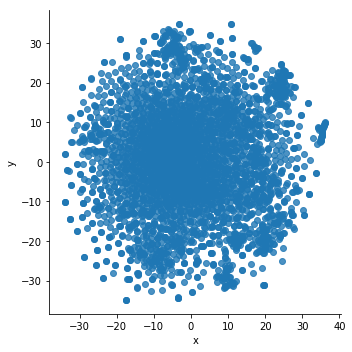

In [19]:
sn.lmplot( "x", "y", data=df, fit_reg=False, size = 5 )

In [20]:
X = df[["x", "y"]] 
clusters = KMeans(4)  
clusters.fit( X ) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
clusters.cluster_centers_

array([[ 12.23896194, -11.79407418],
       [ -8.98690564,  10.82743928],
       [-11.02508564, -11.9941805 ],
       [ 14.93503889,  12.31410603]])

In [22]:
clusters.labels_

array([1, 2, 3, ..., 1, 1, 2])

In [23]:
df["군집"] = clusters.labels_ # 새로운 데이터 프레임 생성 (컬럼하나 추가 군집모델의 예측값)
df.tail()


,x,y,군집
파킨슨,-0.300670,33.129383,1
한예슬,-9.855335,27.485855,1
진찰,0.613197,25.587940,1
지방종,-9.156275,27.353539,1
남극,-15.037825,-2.142799,2


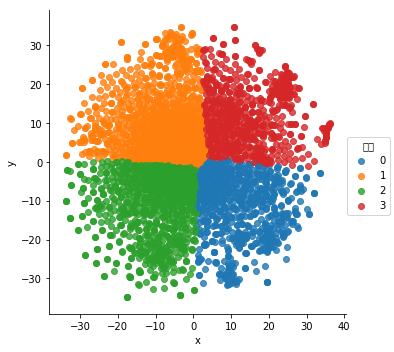

In [24]:
sn.lmplot( "x", "y", data=df,
        hue = "군집",
        fit_reg=False, size = 5 )

In [25]:
df_doc = []
for i in token :
    if i not in df_doc :
        df_doc.append(i)

In [29]:
df.ix[np.where(df.군집 == 1)]

,x,y,군집
층,-27.663490,2.642936,1
성장,0.899783,14.436959,1
역사,-2.560081,9.413497,1
다시,-4.551542,4.124883,1
시민,-2.327320,7.480875,1
사회,-1.674397,18.973671,1
책임,-4.251267,6.800647,1
주변,-22.979593,4.785750,1
위해,1.054971,8.549754,1
자연,-9.338313,0.214876,1


In [30]:
df.ix[np.where(df.군집 == 2)]

,x,y,군집
상단,-11.276952,-8.136345,2
리얼,-8.774031,-6.082306,2
조명,-16.668934,-7.031262,2
작품,-5.663605,-9.060816,2
기본,-12.626766,-6.900682,2
원칙,-12.813096,-6.472410,2
연결,-3.331449,-5.036578,2
키,-5.696126,-14.693779,2
고객,-8.631070,-26.077606,2
설계,-11.051838,-6.475101,2


In [31]:
df.ix[np.where(df.군집 == 3)] 

,x,y,군집
레오,27.367144,16.255520,3
그룹,18.183933,9.378011,3
기업,14.915062,10.331939,3
통해,6.163920,7.413649,3
회사,16.036488,9.579702,3
영국,17.175997,1.672888,3
세계,12.724144,7.694627,3
교류,11.967457,18.771824,3
공동체,16.549353,19.260857,3
의,34.184597,8.693990,3


In [32]:
medical = (embedding_model.most_similar(positive=["의료"], topn=1000))
medical = pd.DataFrame(medical)
medical["cluster"] = 4
medical.head()

politics = (embedding_model.most_similar(positive=["정치"], topn=1000))
politics = pd.DataFrame(politics)
politics["cluster"] = 3
politics.head()

game = (embedding_model.most_similar(positive=["게임"], topn=1000))
game = pd.DataFrame(game)
game["cluster"] = 2
game.head()

economy = (embedding_model.most_similar(positive=["경제"], topn=1000))
economy = pd.DataFrame(economy)
economy["cluster"] = 1
economy.head()

dataset = pd.concat([economy, game, politics, medical])
dataset.columns = ["단어", "유사치", "cluster"]

dataset = dataset.set_index("단어")

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  app.launch_new_instance()


In [33]:
dataset

,유사치,cluster
단어,,
안보,0.503402,1
정치,0.462321,1
번영,0.443363,1
사회,0.433861,1
제조업,0.422709,1
민생,0.422627,1
수출,0.411075,1
관계,0.410263,1
상생,0.395890,1


In [34]:
dataset.sort_values("cluster").to_csv("clustering_data.csv", mode='w', encoding="utf-8")